In [114]:
import numpy as np
import matplotlib.pyplot as plt 
from performance_simulation import *

In [115]:
#General parameters
years = 5
dt = 15
time = 261 * years

#Simulation parameters
yearly_return = 1.07

daily_return = 1.001
daily_loss = 1 - 0.01

gain_phase = 0.7
loss_phase = 1 - gain_phase

mode = "constant_timesteps"
#mode = "constant_gain"


#Tade parameters
trades = 12 * years
max_trades = 20 * years
hold_time = 20
time_after_reversel = 0
smooth_period = 20

trade_coast = 1
spread = 0.002
tax_rate = 0.025
tax_allowance = 1000

initial_capital = 5000
saving_plan = 100
saving_plan_time = 22


sim = ChartSimulation(yearly_return=yearly_return, daily_return=daily_return, daily_loss=daily_loss, gain_phase=gain_phase, loss_phase=loss_phase, mode=mode, 
                      initial_capital=initial_capital, saving_plan=saving_plan, saving_plan_time=saving_plan_time,  dt=dt, time=time, 
                      trades=trades, max_trades=max_trades, hold_time=hold_time, time_after_reversel=time_after_reversel, smooth_period=smooth_period, trade_coast=trade_coast, spread=spread, tax_rate=tax_rate, tax_allowance=tax_allowance
                      )

performance, phase = sim.simulate_performance()

buy_and_hold_performance = sim.buy_and_hold(set='simulation')
random_swing_performance_analyse, trade_dates_random  = sim.random_swing_trade_ana(set='simulation')
swing_performance_analyse, trade_dates = sim.swing_trade_ana(set='simulation')

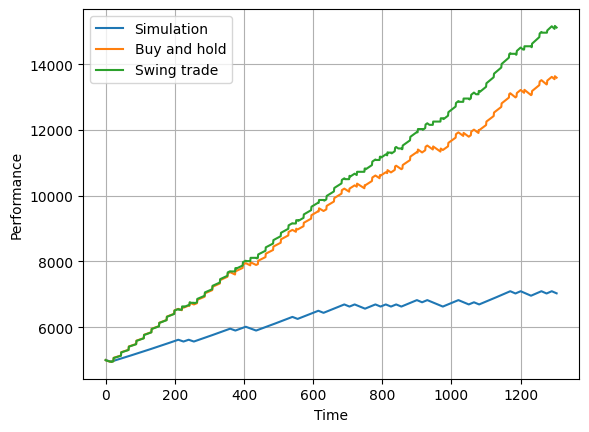

Total money invested:  10931
Index performance: Absolute: 7030.96, Relative: 0.64
Buy and hold return: Absolute: 13592.47, Relative: 1.24
Swing trade return: Absolute: 15117.94, Relative: 1.38
Random swing trade return: Absolute: 10512.7, Relative: 0.96
Best return:  9046.91


In [116]:
plt.plot(performance, label="Simulation")
plt.plot(buy_and_hold_performance, label="Buy and hold")
plt.plot(swing_performance_analyse, label="Swing trade")
#plt.plot(random_swing_performance_analyse, label="Random swing trade")
#plt.axhline(1, color="black", linestyle="--")   

plt.xlabel("Time")
plt.ylabel("Performance")

plt.grid()
plt.legend()

#plt.yscale("log")

plt.show()


#sim.print_parameters()
sim.print_results()
#sim.plot_performance()

In [4]:
mc = MonteCarloSimulation(chartsim=sim, parallel=True)
_ = mc.mc_artificial_chart(n=500)

  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [00:41<00:00, 12.04it/s]


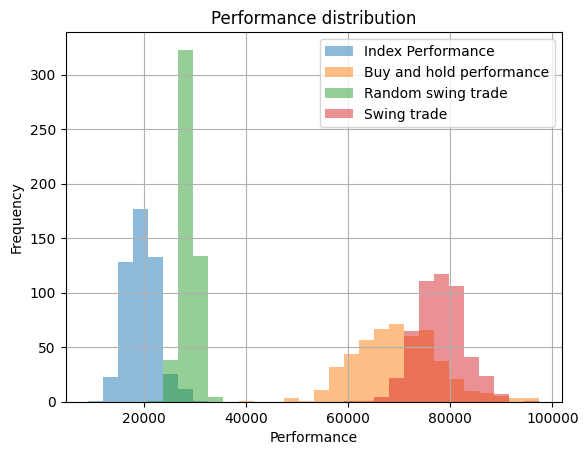

Index performance:
  Overall return: 19647.976 +/- 3122.553 (Median: 19486.846)
  Yearly return: 1.638 +/- 0.013 (Median: 1.639) 

Buy and hold return:
  Overall return: 69676.303 +/- 8243.808 (Median: 69581.34)
  Yearly return: 1.746 +/- 0.01 (Median: 1.746) 

Random swing trade return analyse:
  Overall return: 28851.622 +/- 1471.208 (Median: 28828.422)
  Yearly return: 1.671 +/- 0.004 (Median: 1.671) 

Swing trade return analyse:
  Overall return: 78087.072 +/- 4700.972 (Median: 77955.237)
  Yearly return: 1.756 +/- 0.005 (Median: 1.756) 



In [5]:
mc.hist_performance(bins=30)
mc.print_results(accuracy=3)